## Swell breaking detection

In [6]:
from breaking_detection import Case, Config
import numpy as np
from matplotlib import pyplot as plt

In [2]:
''' New cases with swells '''
config_swell1 = Config(L0=1000, P=999, prefix='/projects/DEIKE/jiarongw/multilayer/swell/field_swell1/')
case = config_swell1.add_realization(LEVEL=10, NL=30, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='',
                                 path='/projects/DEIKE/jiarongw/multilayer/swell/field_swell1/')

config_swell2 = Config(L0=1000, P=999, prefix='/projects/DEIKE/jiarongw/multilayer/swell/field_swell2/')
case = config_swell2.add_realization(LEVEL=11, NL=30, rand=2, RE=40000, Htheta=0.503, prefix='', postfix='',
                                 path='/projects/DEIKE/jiarongw/multilayer/swell/field_swell2_level11/')

Given path does not agree with parameter values!
Given path does not agree with parameter values!


In [3]:
from spectrum_func import spectrum_integration_log, steepness_trunc_non_uniform

In [4]:
''' First compute slope '''
# config_set = [config_swell1] 
config_set = [config_swell2] 
tchoice = 200

for config in (config_set):
    for case in config.cases:
        if (case.NL == 30):            
            eta = case.read_t(fieldname='eta', t=tchoice)  
            case.kmod, theta, case.Fkmod = spectrum_integration_log(eta, CHECK=False, L=config.L0, N=2**case.LEVEL, method='nearest')
            mu, Hs_ = steepness_trunc_non_uniform (case.Fkmod, case.kmod)
            case.mu_plateau = mu[-1]
            case.Hskp = np.var(eta)**0.5*4*case.config.kp
            print(case.Hskp, case.mu_plateau)

0.12304313393034194 0.22360132613356523


In [ ]:
''' Specify time window and frequency '''
tseries_ensem3 = []
for i in range (0,2):    
    tstart = 100 + 50*i
    dt = 1
    tseries = np.arange(tstart, tstart+45, dt)
    tseries_ensem3.append(tseries)

''' Specify 'kp' used for breaking detection criterion (proportional to kp) ''' 
config_set[0].kp = 0.041 # Try using the wind sea peak: need this to specify the detection criterion
# config_set[0].kp = 0.019 # Try using the spectral peak value
 
''' Specify bins of velocity c '''
bins = np.array([0.01])
bins = np.concatenate((bins,np.arange(0.25,15,0.25)))   

''' Compute the breaking stats  ''' 
for k, config in enumerate(config_set):
    for case in config.cases:
        if (case.NL == 30) and (case.rand != 0) and (case.rand != 1):
            print (case.path)
            case.time_window(tseries_ensem3, threshold=0, bins=bins)

/projects/DEIKE/jiarongw/multilayer/swell/field_swell2_level11/


In [14]:
for i, config in enumerate(config_set):
    for case in config.cases:
        if (case.LEVEL != 9) and (case.Npower == 5) and (case.rand != 0) and (case.rand != 1):
            print(case.path)
#             case.cc = plt.cm.get_cmap('Oranges')((case.Hskp-0.05)/0.35) # colored by kpHs
            case.cc = plt.cm.get_cmap('Oranges')((case.mu_plateau-0.05)/0.15) # colored by sigma

/projects/DEIKE/jiarongw/multilayer/swell/field_swell2_level11/


In [ ]:
energy = read(case.path, 'energy_after_remap.dat')
case.dEdt = (energy[energy.t==100]['ke'].values[0] - energy[energy.t==120]['ke'].values[0] + energy[energy.t==100]['gpe'].values[0] - energy[energy.t==120]['gpe'].values[0])/40
print(case.dEdt)

In [ ]:
''' Plot the directional Lambda(c) '''

P=999


NameError: name 'ticker' is not defined

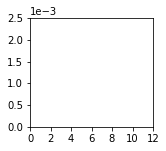

In [10]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

for k, config in enumerate(config_set):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        normx = 1
        normy = 1
        if (case.NL == 15) and (case.Npower == 5) and (case.LEVEL == 9) and (case.rand != 0) and (case.rand != 1) and (j == 0):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.Htheta == 0.503:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, label=config.P, c=case.config.cc, linestyle='-', alpha=1, lw=1)            # The extra filter 

""" Linear lim """
plt.xlim([0,12])
plt.ylim([0,2.5*10**(-3)]) # Linear
plt.xticks(np.array([0,2,4,6,8,10,12])) # Linear x
plt.yticks(np.array([0,0.5e-3,1e-3,1.5e-3,2e-3,2.5e-3])) # Linear y
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # linear

formatter = ticker.FormatStrFormatter('?%1.2f')
formatter = ticker.FormatStrFormatter('%g')
Axis.set_major_formatter(ax.xaxis, formatter)

plt.xlabel(r'$c(ms^{-1})$', labelpad=0); 
plt.ylabel(r'$\Lambda(c)(m^{-2}s)$', labelpad=0)




# plot_inset(axin)
# axin.tick_params(axis='both', which='major', labelsize=6)
# axin.minorticks_off()

# left, bottom, width, height = [0.37, 0.34, 0.55, 0.55]
# ax2 = fig.add_axes([left, bottom, width, height])
# import matplotlib.image as mpimg
# image = mpimg.imread('figures_new/spectrum_inset.png')
# ax2.imshow(image)
# ax2.axis('off')

In [13]:
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/thesis.mplstyle')
from cycler import cycler
shade_cycler = (cycler(color=['blue', 'purple', 'magenta', 'pink']) + cycler(linestyle=['-', '--', ':', '-.']))

P=999
cp = 15.4604 m/s


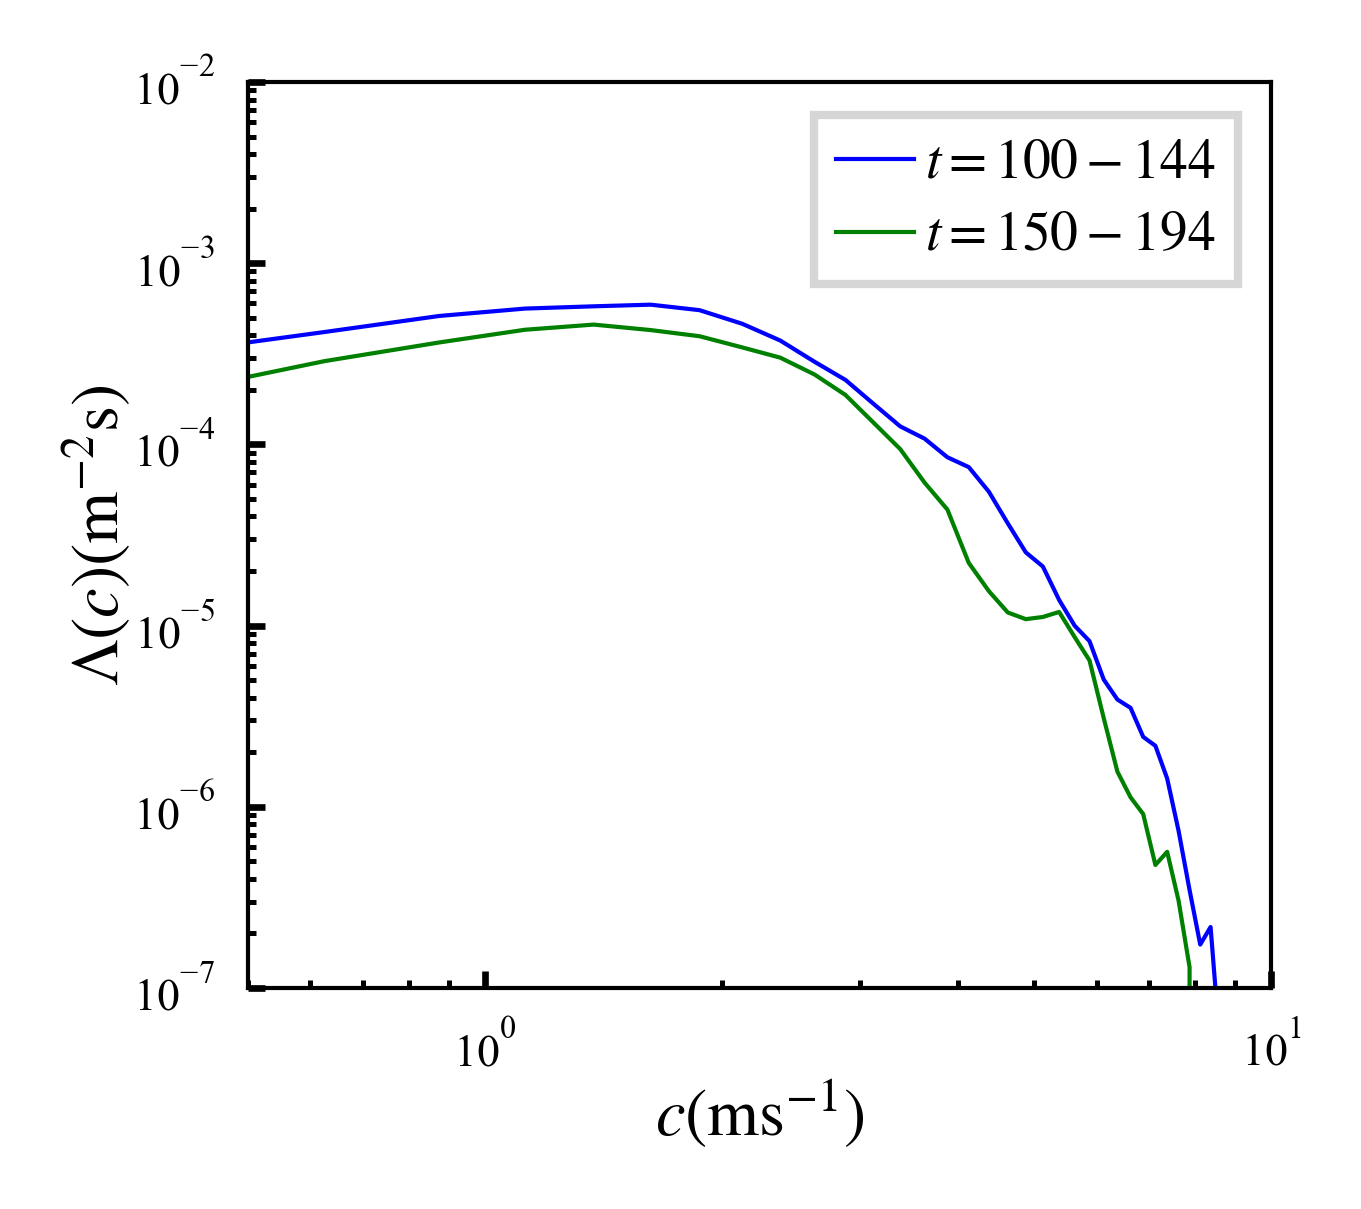

In [36]:
""" Not normalized Lambda(x) distribution. In both linear and lof scale.
    hist is the number of point in each bin: normalization """
fig = plt.figure(figsize=[2.2,2]); ax = plt.gca()

for k, config in enumerate(config_set[0:2]):
    print('P=%g' %config.P)
    for j,case in enumerate(config.cases):
        normx = 1
        normy = 1
#         normx = (9.8/config.kp)**0.5
#         normy = 1/((9.8/config.kp)**1.5/9.8)
        print('cp = %g m/s' %(9.8/config.kp)**0.5)
        if (case.NL == 30) and (case.Npower == 5) and (case.LEVEL != 9) and (case.rand != 0) and (case.rand != 1):
            bins = case.hist_ensem['bins']
            bins_plotting = bins[1:] - (bins[2] - bins[1])/2
            for i,hist in enumerate(case.hist_ensem['hist_ensem']):
                if case.LEVEL == 10:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='$t=%g - %g$' %(case.hist_ensem['tseries_ensem'][i][0], case.hist_ensem['tseries_ensem'][i][-1]))
                if case.LEVEL == 11:
                    plt.plot(bins_plotting/normx, hist/2**case.LEVEL/case.config.L0/(bins[2] - bins[1])/normy, 
                             label='$t=%g - %g$' %(case.hist_ensem['tseries_ensem'][i][0], case.hist_ensem['tseries_ensem'][i][-1]))           


""" Log lim """
plt.xscale('log'); plt.yscale('log')

# plt.xlim([0.1,2])
# plt.ylim([10**(-4),10**(0)])
# plt.xlabel(r'$c/c_p$')
# plt.ylabel(r'$\Lambda(c)c_p^3g^{-1}$')


plt.xlim([0.5,10])
plt.ylim([10**(-7),10**(-2)])
plt.xlabel(r'$c (\mathrm{ms}^{-1})$', labelpad=0)
plt.ylabel(r'$\Lambda(c) (\mathrm{m^{-2}s})$' , labelpad=0)
plt.legend()


In [27]:
case.hist_ensem

{'tseries_ensem': [array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
         139, 140, 141, 142, 143, 144]),
  array([150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
         163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
         176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
         189, 190, 191, 192, 193, 194])],
 'hist_ensem': [array([5.92888889e+01, 1.57933333e+02, 2.13422222e+02, 2.61777778e+02,
         2.87555556e+02, 2.95933333e+02, 3.02177778e+02, 2.81800000e+02,
         2.37022222e+02, 1.91600000e+02, 1.46400000e+02, 1.16133333e+02,
         8.53111111e+01, 6.43555556e+01, 5.50444444e+01, 4.34666667e+01,
         3.83555556e+01, 2.80666667e+01, 1.87555556e+01, 1.29777778e+01,
         1.08444444e+01, 7.08888889e+00, 5.11111111e+00, 4.20000000e+00,
    